In [1]:
%matplotlib inline


# Tornado Analyses
This sample script illustrates how to retrieve and analyze the Storm Prediction Center (SPC) tornado database (1950-present), using both the tornado and tracks modules.

For documentation generation purposes, return_ax must be set True for plotting functions. You don't need to have this extra argument in every plotting function call (e.g., "storm.plot(return_ax=True)" will produce the same output as "storm.plot()").



In [2]:
import tropycal.tracks as tracks
import tropycal.tornado as tornado
import datetime as dt

/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/recon/dataset.py:630: SyntaxWarning: "is" with a literal. Did you mean "=="?
/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/recon/dataset.py:630: SyntaxWarning: "is" with a literal. Did you mean "=="?


## Using TornadoDataset
Let's start by creating an instance of a TornadoDataset object. By default, this reads in the SPC tornado database from their website.



In [3]:
tor_data = tornado.TornadoDataset()

--> Starting to read in tornado track data
--> Completed reading in tornado data for 1950-2018 (8.62 seconds)


We can use a TornadoDataset object to analyze both tornadoes associated with tropical cyclones and non-TC tornadoes. As an example of the latter, we can make a plot of all tornadoes during the 27 April 2011 tornado outbreak, along with the Practically Perfect Forecast (PPH) in filled contours:



/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/tornado/tools.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/tornado/plot.py:187: MatplotlibDeprecationWarning

<GeoAxesSubplot:title={'left':'Tornado tracks and daily PPH (%)','right':'Start ... 12:02 UTC 27 Apr 2011\nEnd ... 11:50 UTC 28 Apr 2011'}>

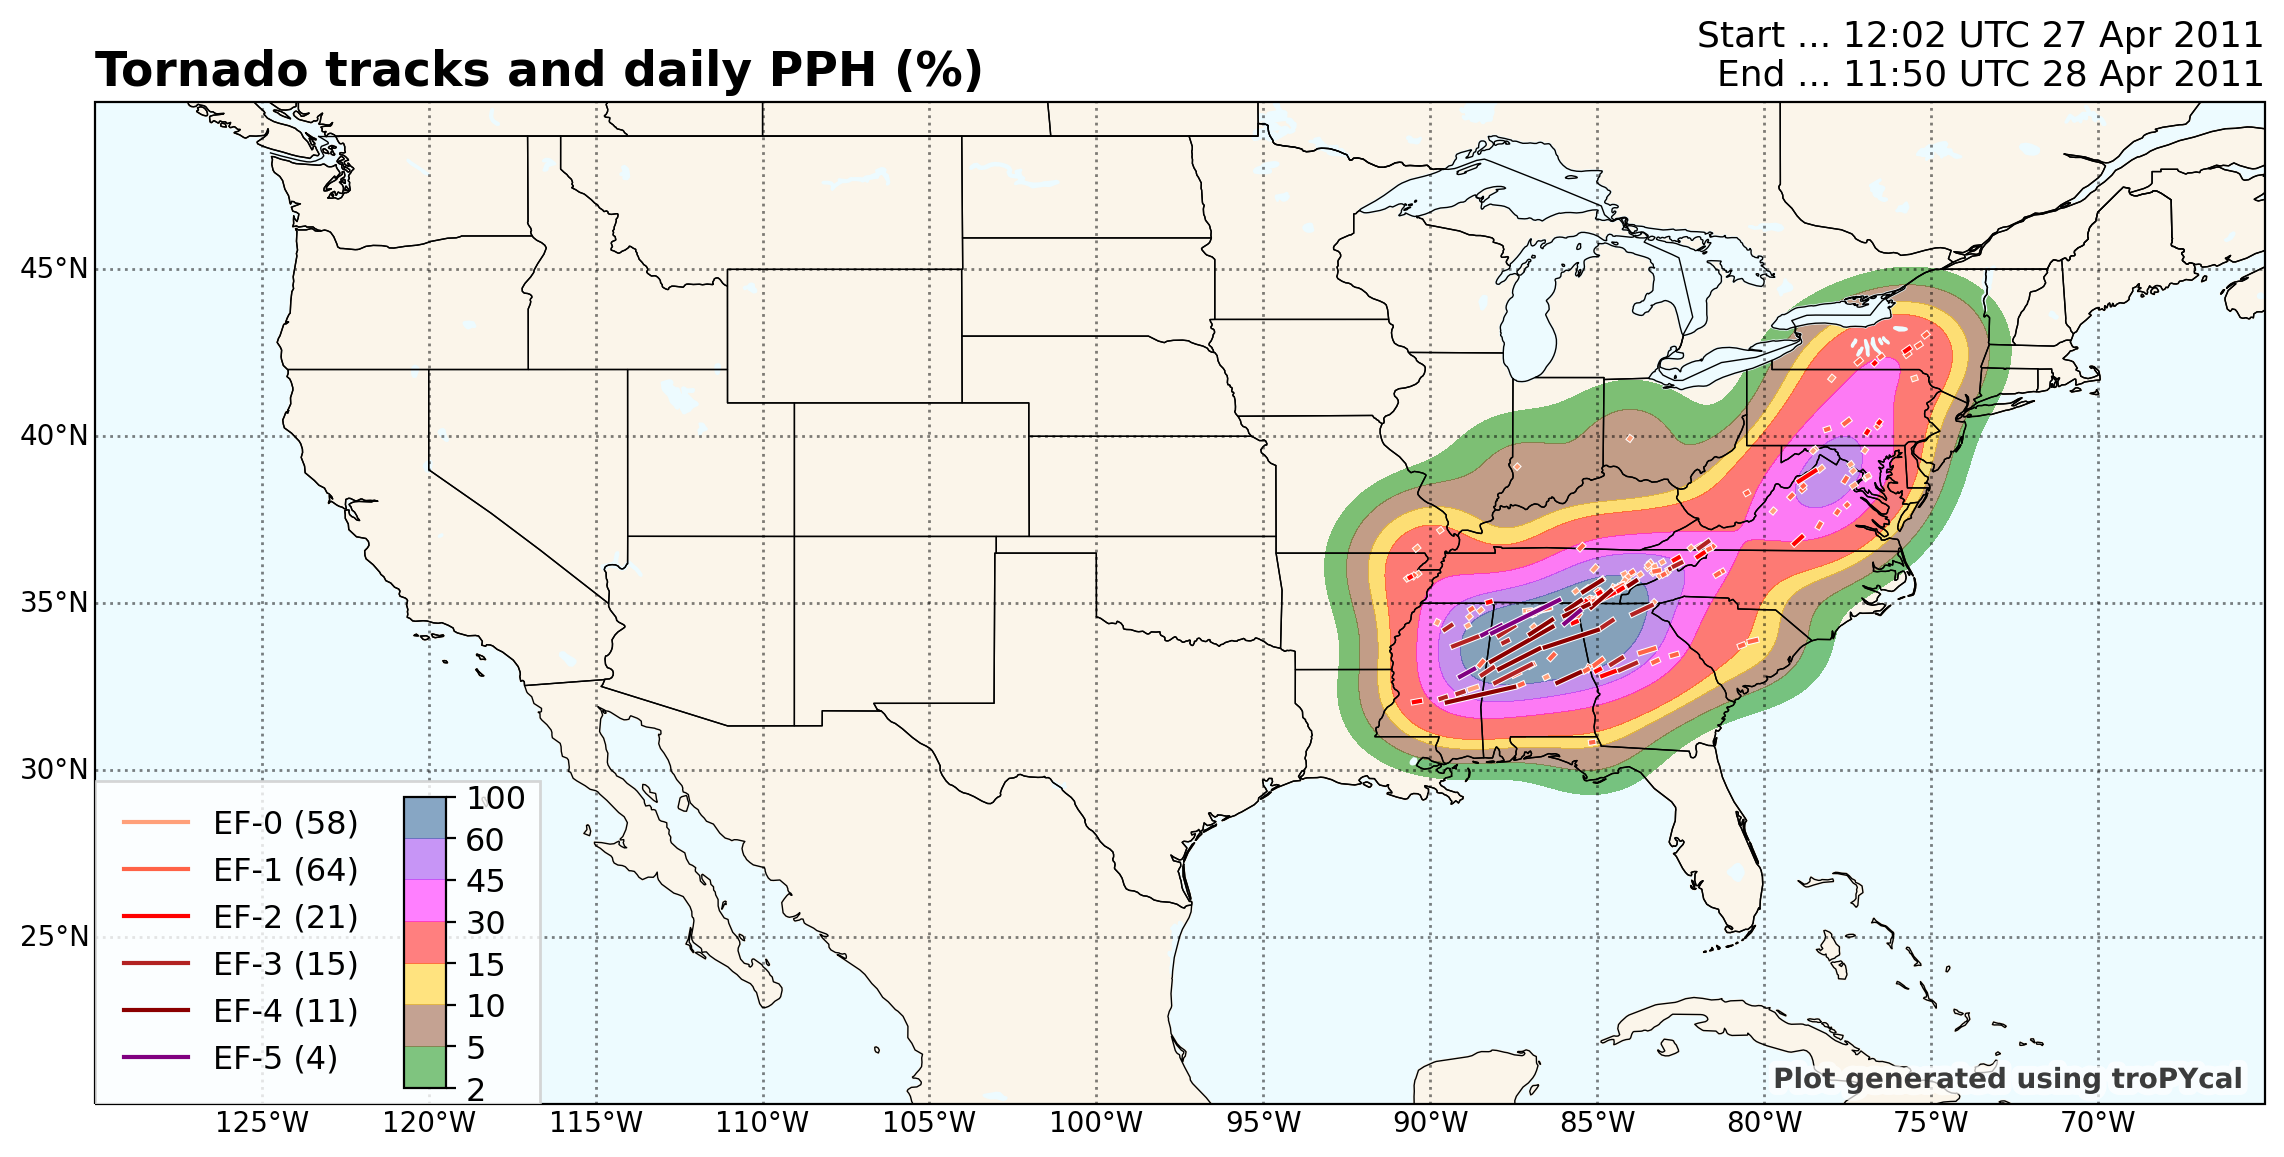

In [4]:
tor_ax,domain,leg_tor = tor_data.plot_tors(dt.datetime(2011,4,27),plotPPH=True,return_ax=True)
tor_ax

## Using TrackDataset
We can also use TornadoDataset to assess tornadoes associated with tropical cyclones. First off let's get an instance of TrackDataset for the North Atlantic HURDAT2 basin:



In [5]:
hurdat_atl = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (3.29 seconds)


This instance of Storm contains several methods that return the storm data back in different data types. The following examples will show how to retrieve 3 different data types.

Now we want to attribute tornadoes from the SPC database to all tropical cyclones which produced tornadoes. We do so using the ``assign_storm_tornadoes()`` method of TrackDataset. The main input parameter is "dist_thresh", which controls the distance from the tropical cyclone center over which to attribute tornadoes to. For this example we'll use 750 kilometers as the threshold.

This code block will take a while to run, as it will iterate over every storm in HURDAT2 and match tornadoes to those that produced them.



In [6]:
hurdat_atl.assign_storm_tornadoes(dist_thresh=750)

--> Starting to read in tornado track data
--> Completed reading in tornado data for 1950-2018 (17.14 seconds)
--> Starting to assign tornadoes to storms
--> Completed assigning tornadoes to storm (470.14 seconds)


Once the above block is done running, we can now look at a climatology of tornadoes associated with North Atlantic tropical cyclones. The current method of analysis is via the ``plot_TCtors_rotated()`` method, which rotates tropical cyclones to a storm motion relative framework.

Most tornadoes associated with tropical cyclones occur in the front right quadrant (i.e., forward and right of the storm track). We can visualize this by plotting all tornadoes associated with tropical cyclones in a motion relative framework:



{'ax': <AxesSubplot:title={'center':'Composite motion-relative tornadoes\nMin threshold: EF-0 | n=214 storms'}, xlabel='Left/Right of Storm Heading (km)', ylabel='Behind/Ahead of Storm Heading (km)'>}

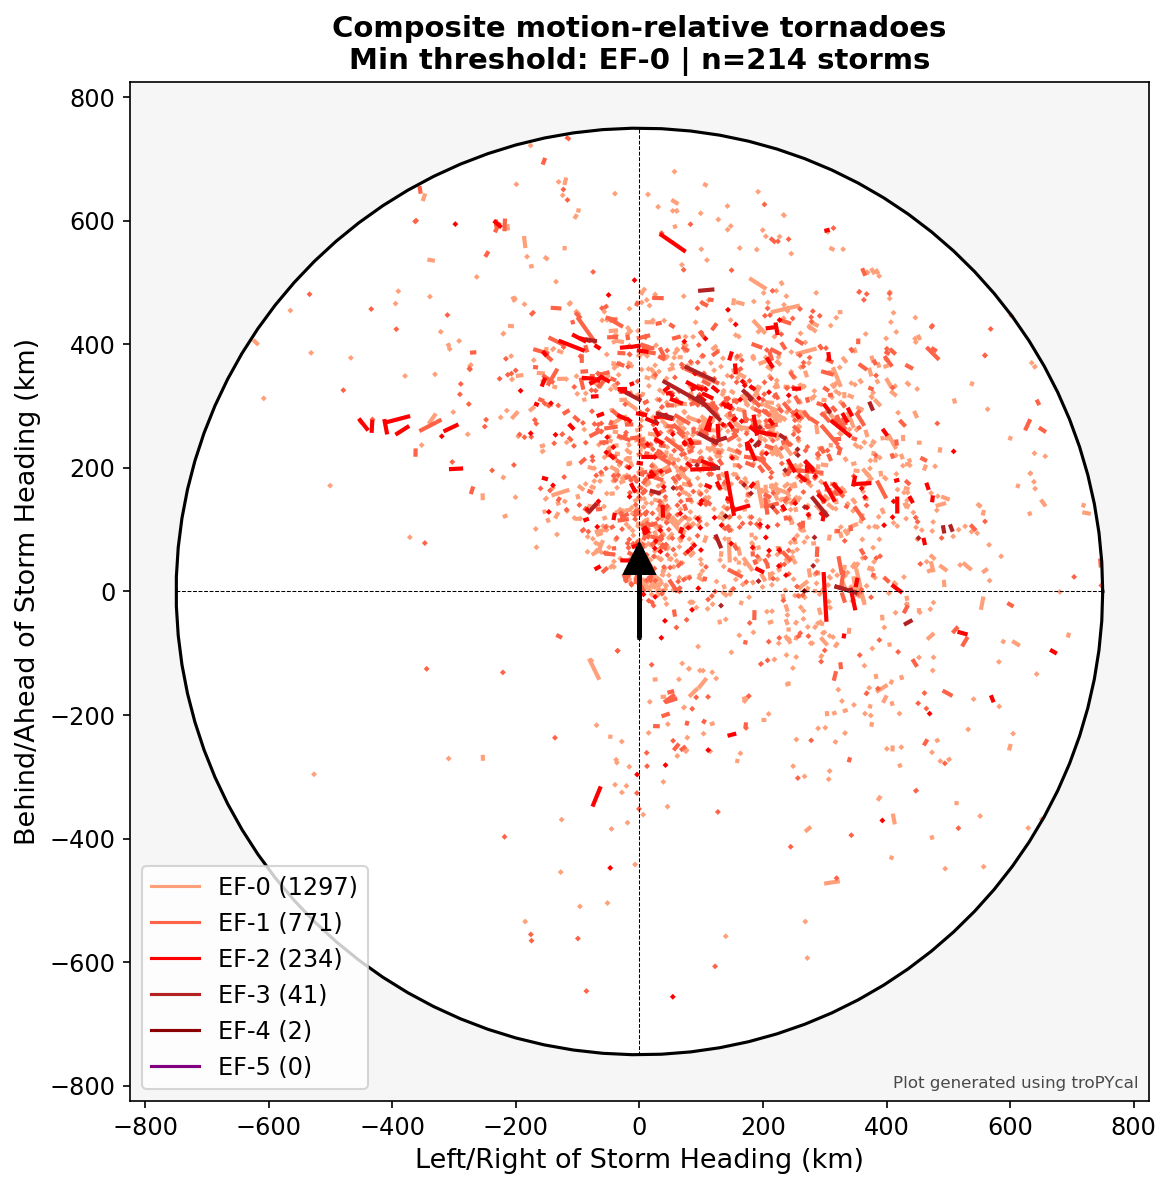

In [7]:
hurdat_atl.plot_TCtors_rotated('all',return_ax=True)

We can also make the same plot for a composite subset of tropical cyclones, given either their IDs (e.g., "AL052004"), or a storm tuple. For instance, let's composite the four hurricanes that made landfall in Florida in 2004:



{'ax': <AxesSubplot:title={'center':'Composite motion-relative tornadoes\nMin threshold: EF-0 | n=4 storms'}, xlabel='Left/Right of Storm Heading (km)', ylabel='Behind/Ahead of Storm Heading (km)'>}

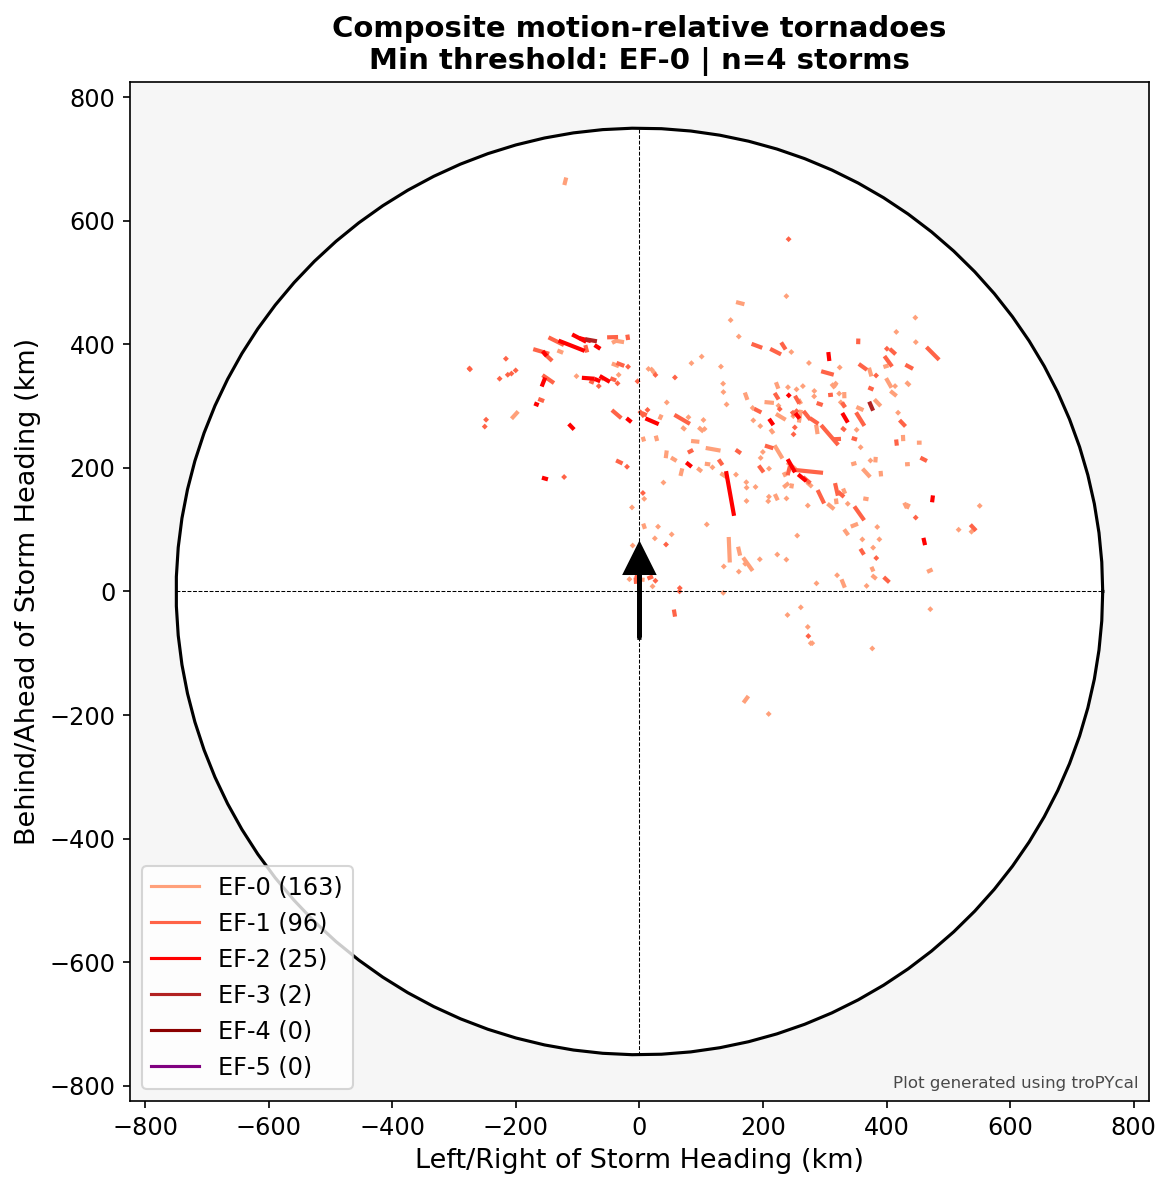

In [8]:
hurdat_atl.plot_TCtors_rotated(storms=[('charley',2004),('frances',2004),('ivan',2004),('jeanne',2004)],return_ax=True)

## Using a Storm object

Tropical cyclone tornado analyses can also be done via a Storm object. Let's get the data for Hurricane Ivan from 2004, which produced a major tornado outbreak:

<div class="alert alert-danger"><h4>Warning</h4><p>If you retrieve an instance of a Storm object without first running ``TrackDataset.assign_storm_tornadoes()`` method, doing tornado analyses with a Storm object will require re-downloading the tornado database for each new instance of Storm. If you plan to analyze multiple storms with tornadoes, it is recommended to run ``assign_storm_tornadoes()`` first.</p></div>



In [9]:
storm = hurdat_atl.get_storm(('ivan',2004))

Let's plot all the tornado tracks, and daily PPH, associated with Hurricane Ivan:



/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/tornado/plot.py:187: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute

<GeoAxesSubplot:title={'left':'Hurricane IVAN\nTornado tracks and daily PPH (%)','right':'02 Sep 2004 – 24 Sep 2004\n145 kt • 910 hPa • 70.4 ACE'}>

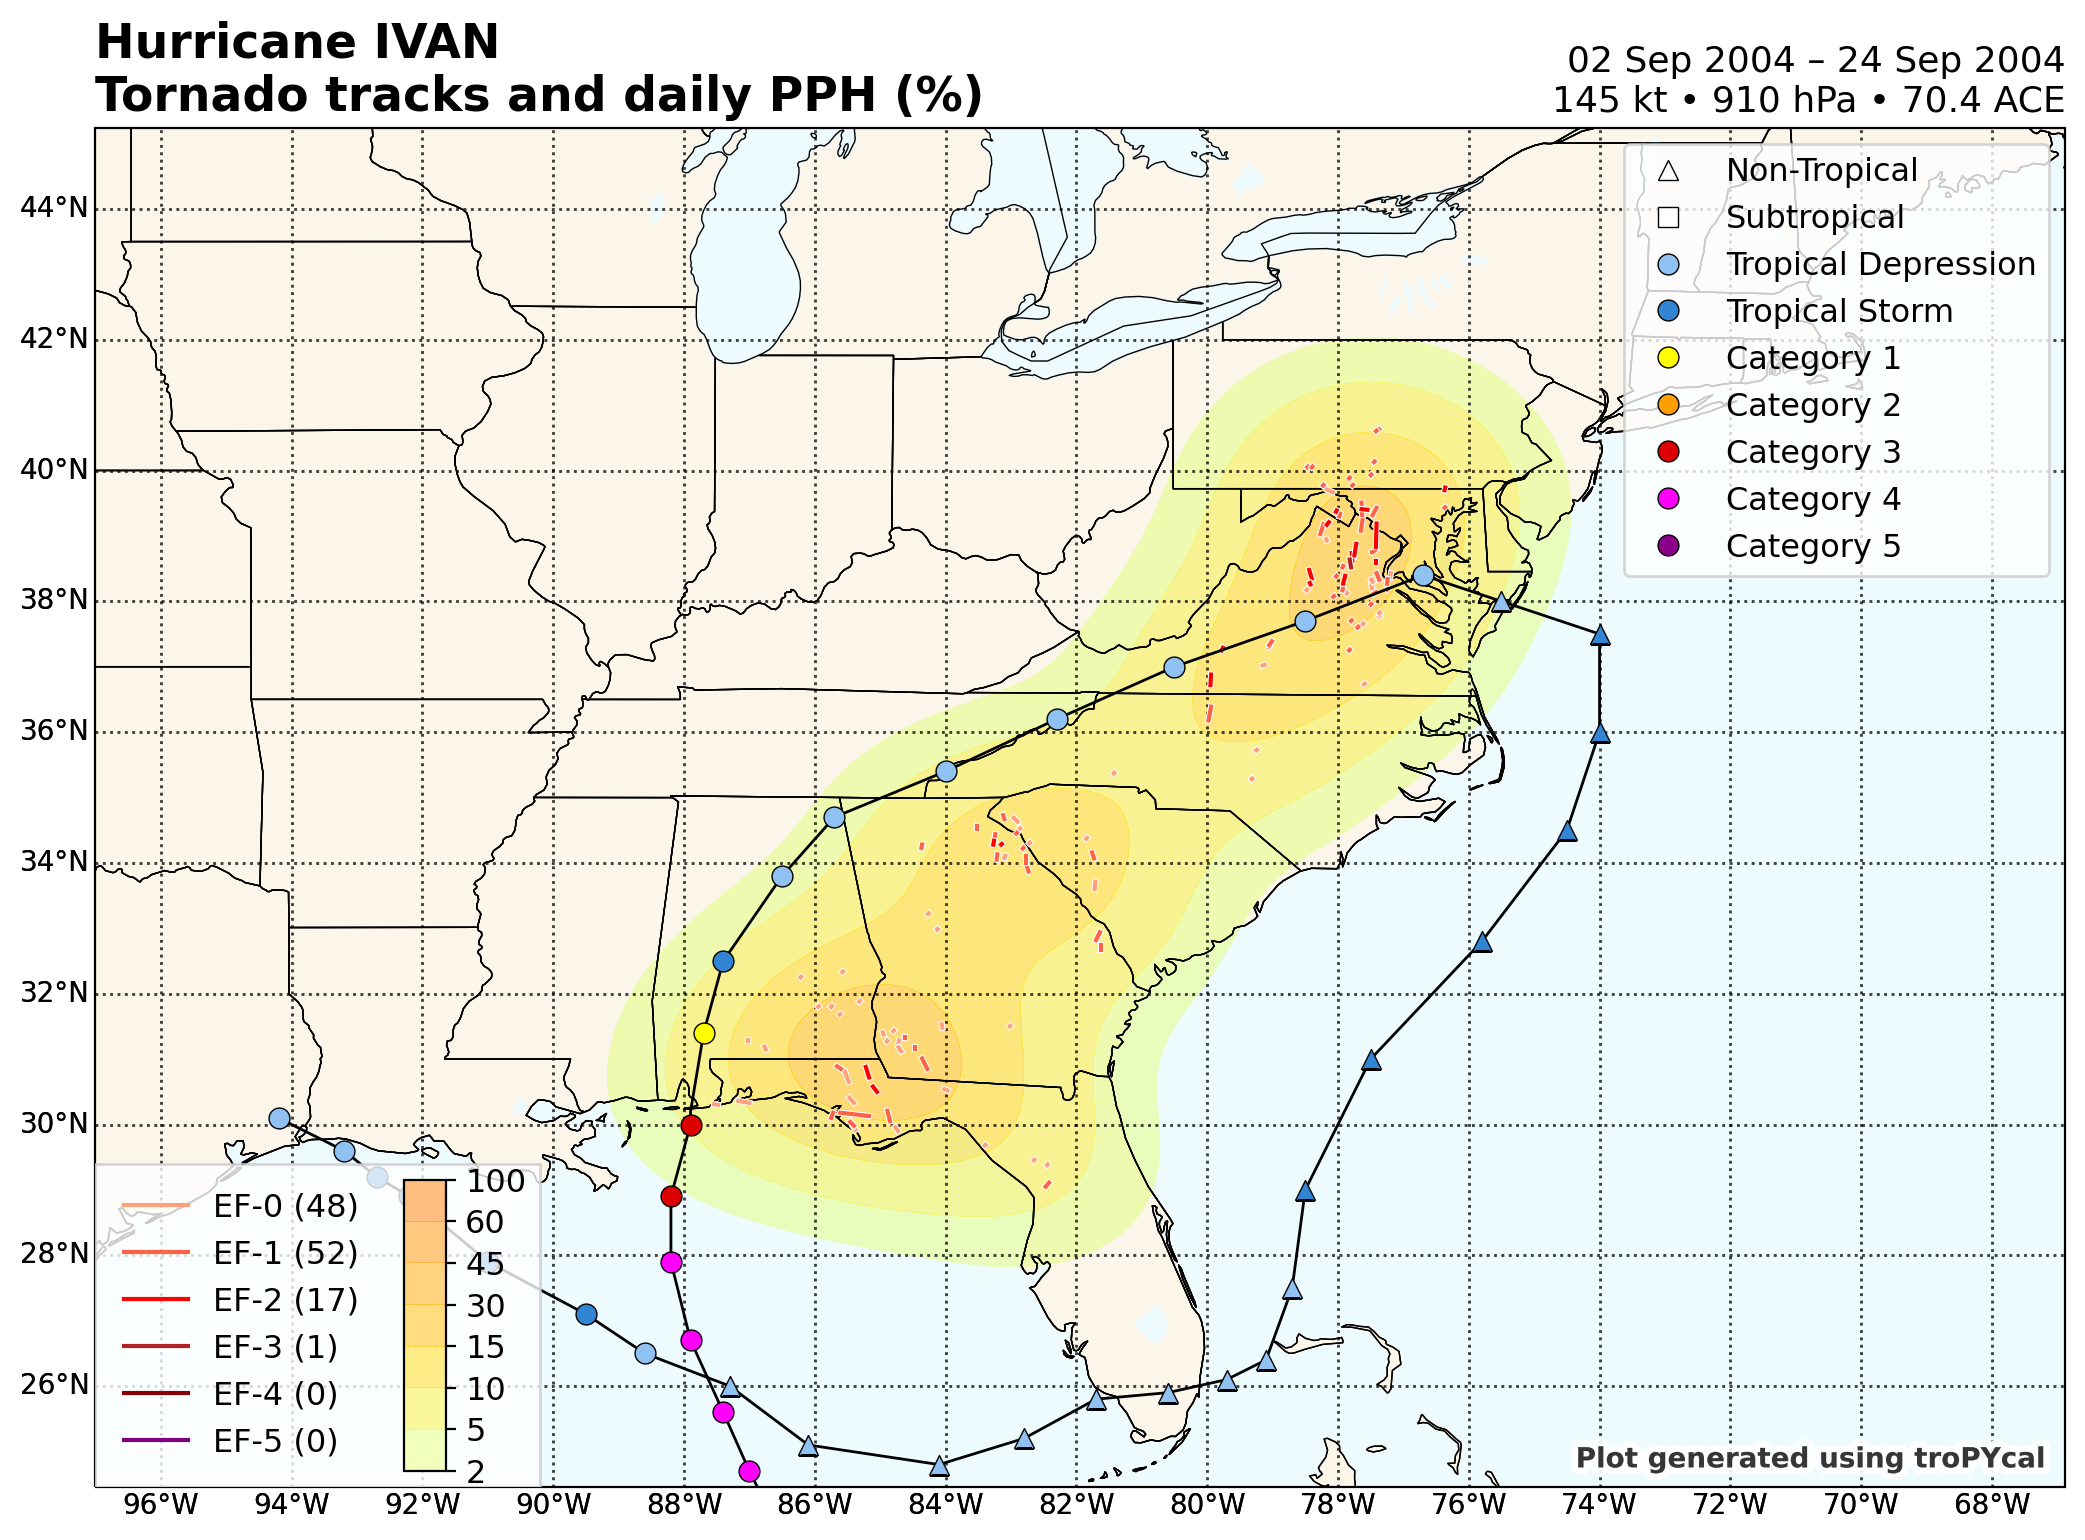

In [10]:
storm.plot_tors(plotPPH=True,return_ax=True)

Let's make a plot of the tornadoes in storm motion relative coordinates:



<AxesSubplot:title={'center':'IVAN 2004 tornadoes relative to heading'}, xlabel='Left/Right of Storm Heading (km)', ylabel='Behind/Ahead of Storm Heading (km)'>

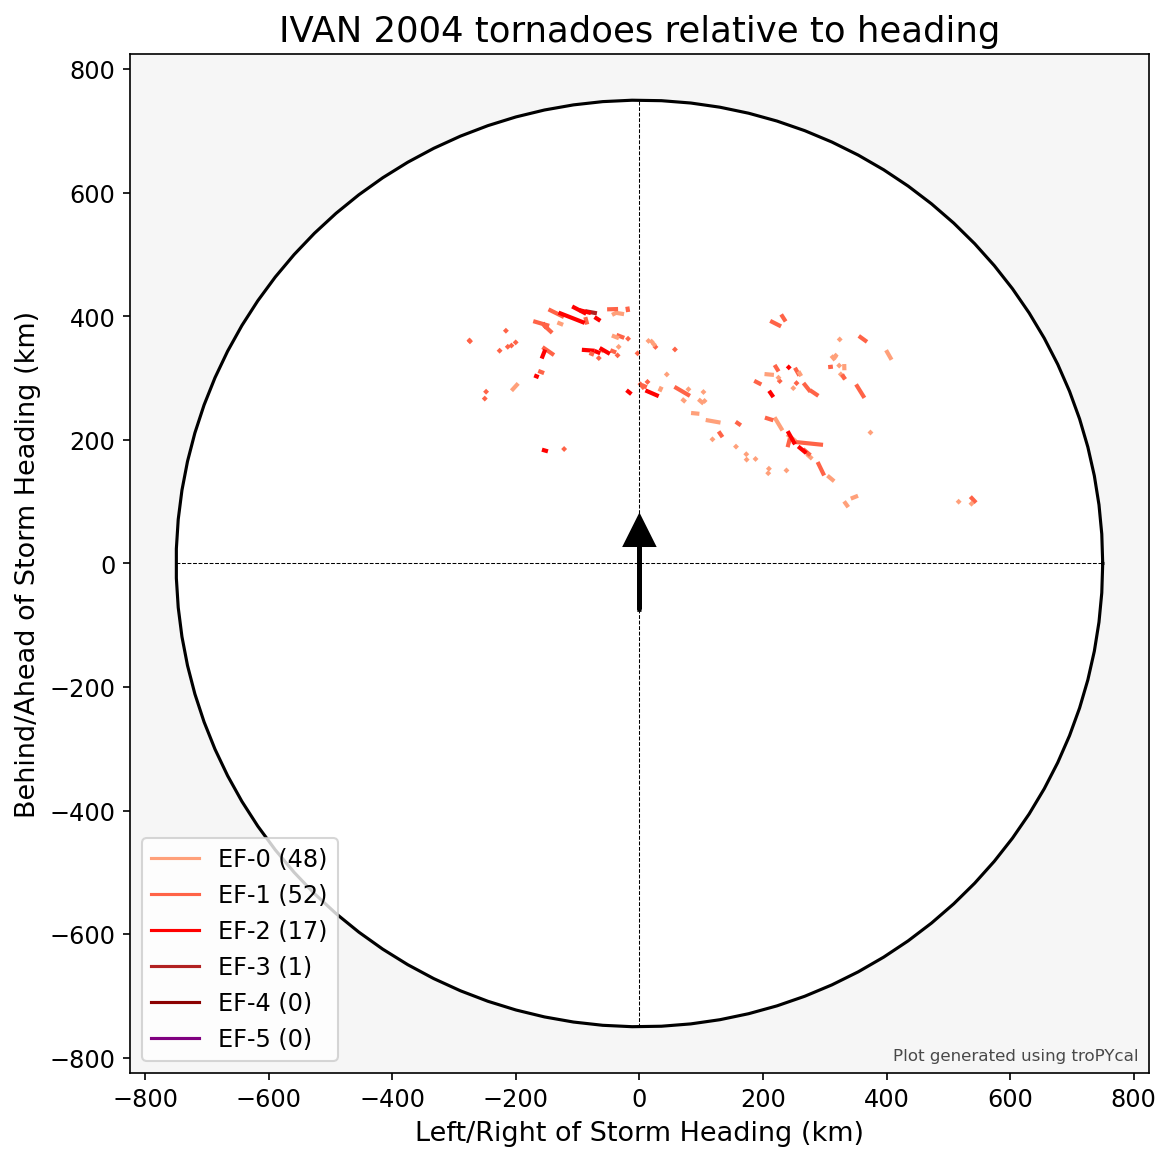

In [11]:
storm.plot_TCtors_rotated(return_ax=True)